### Assignment - Intel Image Classification using CNN
- Discipline: EEE6553 - Advanced Deep Learning
- Assignment: 1 
- Question: 2
- Student: Fabio Caversan

### 1. Libraries and imports

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

print("All libraries importerd sucessfully.")
print("="*80)

All libraries importerd sucessfully.


### 2. GPU Detection and Configuration
Check for GPU availability and enable memory growth to prevent TensorFlow from allocating all GPU memory at once.

In [2]:
# Detect available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPU DETECTED: {gpus}")
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print("Memory growth enabled for GPU")
else:
    print("NO GPU DETECTED - running on CPU (will be slow!)")

print("="*80)

GPU DETECTED: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Memory growth enabled for GPU


## 3. Configuration and Hyperparameters
Define dataset paths and training hyperparameters.

In [20]:
# Dataset paths
train_dir = 'datasets/Image classification-Intel datset/new_Intel_training_dataset'
test_dir = 'datasets/Image classification-Intel datset/new_Intel_testing_dataset'

# Hyperparameters
num_classes = 6
batch_size = 64
img_size = (224, 224)
epochs = 100
learning_rate = 1e-4
validation_split = 0.2

print("Configuration:")
print(f" Training directory: {train_dir}")
print(f" Test directory: {test_dir}")
print(f" Number of classes: {num_classes}")
print(f" Batch size: {batch_size}")
print(f" Image size: {img_size}")
print(f" Maximum epochs: {epochs}")
print(f" Learning rate: {learning_rate}")
print(f" Validation split: {validation_split*100}%")

Configuration:
 Training directory: datasets/Image classification-Intel datset/new_Intel_training_dataset
 Test directory: datasets/Image classification-Intel datset/new_Intel_testing_dataset
 Number of classes: 6
 Batch size: 64
 Image size: (224, 224)
 Maximum epochs: 100
 Learning rate: 0.0001
 Validation split: 20.0%


## 4. Data Loading and Augmentation
Create data generators with augmentation for training and validation/test sets.

In [21]:
# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,              # Normalize to [0, 1]
    horizontal_flip=True,          # Random horizontal flips
    validation_split=validation_split  # Split 20% for validation
)

# Test data generator (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(
    rescale=1.0/255
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Validation generator
val_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print(f"Data generators created successfully")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")
print(f"Test samples: {test_generator.samples}")

Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Found 600 images belonging to 6 classes.
Data generators created successfully
Training samples: 2400
Validation samples: 600
Test samples: 600


## 5. Model Architecture
Build a CNN with 4 convolutional blocks, Batch Normalization, and Dropout regularization.

In [44]:
# Build Sequential CNN model
model = Sequential([
    # Input layer
    tf.keras.Input(shape=(224, 224, 3)),
    
    # Convolutional Block 1
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Convolutional Block 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Convolutional Block 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Convolutional Block 4
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    # Flatten and Dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(num_classes, activation='softmax')  # 6 output classes
])

print("Model architecture created successfully")

Model architecture created successfully


## 6. Model Compilation and Summary
Compile the model with Adam optimizer and display the architecture.

In [45]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 222, 222, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_9 (Batc  (None, 109, 109, 64)     256       
 hNormalization)                                                 
                                                      

## 7. Training with Early Stopping
Train the model with validation monitoring and early stopping to prevent overfitting.

In [46]:
# Configure early stopping
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

print("Starting training...")

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop]
)

print("\nTraining completed!")

Starting training...
Epoch 1/100
38/38 [==============================] - 10s 232ms/step - loss: 1.6732 - accuracy: 0.4675 - val_loss: 3.0752 - val_accuracy: 0.1667
Epoch 2/100
38/38 [==============================] - 9s 226ms/step - loss: 1.0961 - accuracy: 0.5921 - val_loss: 4.6510 - val_accuracy: 0.1667
Epoch 3/100
38/38 [==============================] - 7s 192ms/step - loss: 0.9820 - accuracy: 0.6392 - val_loss: 6.5110 - val_accuracy: 0.1667
Epoch 4/100
38/38 [==============================] - 7s 185ms/step - loss: 0.8431 - accuracy: 0.6792 - val_loss: 8.5550 - val_accuracy: 0.1667
Epoch 5/100
38/38 [==============================] - 7s 186ms/step - loss: 0.7227 - accuracy: 0.7342 - val_loss: 8.8489 - val_accuracy: 0.1667
Epoch 6/100
38/38 [==============================] - 7s 194ms/step - loss: 0.6815 - accuracy: 0.7487 - val_loss: 8.3296 - val_accuracy: 0.1700
Epoch 7/100
38/38 [==============================] - 8s 197ms/step - loss: 0.6262 - accuracy: 0.7608 - val_loss: 7.0912 

## 8. Training Curves Visualization
Plot training and validation accuracy/loss curves to analyze model performance.

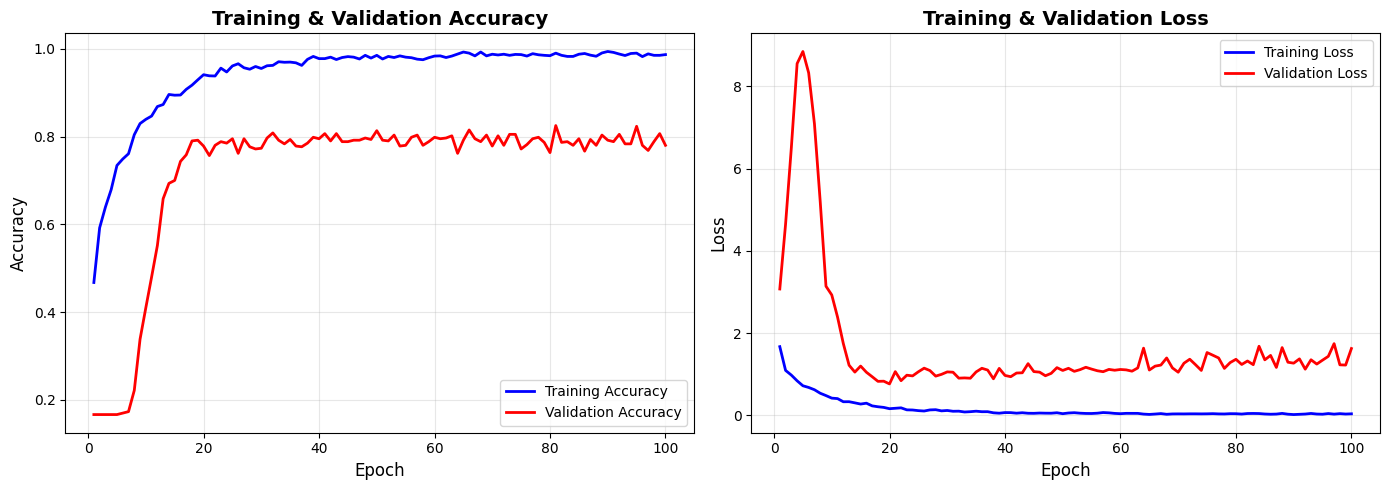


Final Training Metrics:
 Training Accuracy: 0.9867
 Validation Accuracy: 0.7800
 Training Loss: 0.0408
 Validation Loss: 1.6279


In [47]:
# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Create figure with two subplots
plt.figure(figsize=(14, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b-', label='Training Accuracy', linewidth=2)
plt.plot(epochs_range, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Training & Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b-', label='Training Loss', linewidth=2)
plt.plot(epochs_range, val_loss, 'r-', label='Validation Loss', linewidth=2)
plt.title('Training & Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_validation_curves.png', dpi=150, bbox_inches='tight')
plt.show()

# Print final metrics
print(f"\nFinal Training Metrics:")
print(f" Training Accuracy: {acc[-1]:.4f}")
print(f" Validation Accuracy: {val_acc[-1]:.4f}")
print(f" Training Loss: {loss[-1]:.4f}")
print(f" Validation Loss: {val_loss[-1]:.4f}")

## 9. Test Set Evaluation
Evaluate the model on the separate test set to measure final performance.

In [48]:
# Reset test generator
test_generator.reset()

# Evaluate on test set
print("Evaluating on test set...\n")
test_loss, test_acc = model.evaluate(test_generator, verbose=1)

print(f"\n{'='*80}")
print(f"TEST SET RESULTS")
print(f"{'='*80}")
print(f" Test Loss: {test_loss:.4f}")
print(f" Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"{'='*80}")

Evaluating on test set...

10/10 [==============================] - 1s 63ms/step - loss: 1.5815 - accuracy: 0.7583

TEST SET RESULTS
 Test Loss: 1.5815
 Test Accuracy: 0.7583 (75.83%)


## 10. Confusion Matrix
Visualize the confusion matrix to understand per-class performance.

10/10 [==============================] - 1s 73ms/step


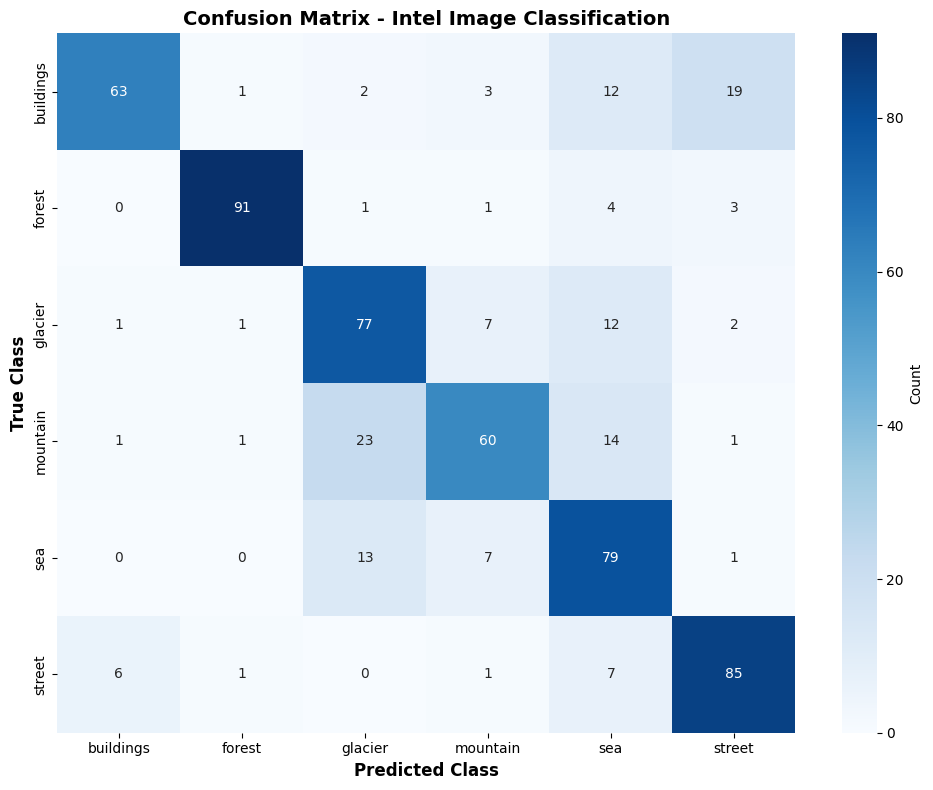

In [49]:
# Get predictions
test_generator.reset()
pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Class', fontsize=12, fontweight='bold')
plt.ylabel('True Class', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Intel Image Classification', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 11. Classification Report
Display detailed per-class metrics including precision, recall, and F1-score.

In [50]:
# Generate and print classification report
print("DETAILED CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_true, y_pred, target_names=class_names))
print("="*80)

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

   buildings       0.89      0.63      0.74       100
      forest       0.96      0.91      0.93       100
     glacier       0.66      0.77      0.71       100
    mountain       0.76      0.60      0.67       100
         sea       0.62      0.79      0.69       100
      street       0.77      0.85      0.81       100

    accuracy                           0.76       600
   macro avg       0.78      0.76      0.76       600
weighted avg       0.78      0.76      0.76       600



## 12. Save Trained Model
Save the trained model for future inference.

In [51]:
# Save model
model_path = 'intel_cnn_best_model.keras'
model.save(model_path)

print(f"Model saved successfully to: {model_path}")

Model saved successfully to: intel_cnn_best_model.keras


## 13. Summary and Conclusions

### All the models attempted: 

- Run 1: Macro F1 = 0.70 (baseline)
- Run 2: Macro F1 = 0.72 (added layers)
- Run 3: Macro F1 = 0.73 (validation split)
- Run 4: Macro F1 = 0.70 (aggressive aug)
- Run 5: Macro F1 = 0.55 (too much dropout)
- Run 6: Macro F1 = 0.70 (light dropout)
- Run 7: Macro F1 = 0.73 (BatchNorm)
- Run 8: Macro F1 = 0.76 (Current Model)

### Best results: 

- **4 Convolutional Blocks** with increasing filter sizes (32 → 64 → 128 → 256)
- **Batch Normalization** after each convolutional layer for training stability
- **Dropout (0.5)** in the dense layer for regularization
- **Total Parameters**: ~5.1 million

### Training Strategy
- **Validation Split**: 20% of training data (600 images)
- **Data Augmentation**: Horizontal flips
- **Early Stopping**: Patience of 20 epochs monitoring validation accuracy
- **Optimizer**: Adam with learning rate 1e-4
